<a href="https://colab.research.google.com/github/dlskawns/RecSys_and_Retrieval_Study/blob/main/7_6_Latent_Dirichlet_Allocation_recsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LDA (Latent Dirichlet Allocation)
토픽 모델링에 활용되는 것으로, 잠재 디리클래 할당이라고 불림  
* 문서의 집합에서 각 문서들의 토픽을 추출하는 방법
* 주어진 글들 Documents 내에 있는 각 Document
* 디리클레 분포로 가정하고 풀어낸다. 확률 모형에 근거하여 진행. 토픽이란 것을 k개 정의해서 이 것들의 분포를 추정하는 것
* 사실상 각각의 토픽이 무엇을 의미하는지는 알 수 없지만, 그렇게 정해진 토픽을 뜯어보다 보면 어떤 것들이 묶여있는지 알 수 있다.
* 확률분포의 파라미터를 추정하는 parametric model


## 자연어 처리 LDA 이론


### Dirichlet Distribution

* $x_1,x_2...,x_k$가 모두 양의 실수이고 $\sum_{i=1}^k, k_i=1$을 만족할 때 
  * $\alpha_1,...\alpha_k$가 학습해야 하는 파라미xj가 된다.
  * 이를 정의하면, $f(x_1,...x_k;\alpha_1,...\alpha_k)=\frac {1}{B(\alpha)}\displaystyle\Pi_{i=1}^kx_i^{a_i-1}$
  * 이와 같은 확률분포 내에서 랜덤하게 샘플링 했을 때 vector $[x_1,...,x_k]$가 나오게 되는 것.
  * 그리고 해당 vectors의 합은 1이므로 각 vector를 확률로 나타낼 수 있음

### k= 3 일 때의 디리클래 분포
* 왼쪽 위: 세개 모두 alpha 값이 낮다.
  * 많이 퍼져있다.
* 오른쪽 위: 세개 모두 alpha 값이 높다.
  * 퍼져있지 않지만, 고르게 모여있다. 중앙에 가깝다.
* 왼쪽 아래: 첫번째는 alpha가 낮고 두번째 세번째에 쏠려있다.
* 오른쪽 아래: 세번째에 좀 더 쏠려있다.
  * 이 경우 샘플을 추출해도 저 색칠된 칸 내에서만 나오는 것


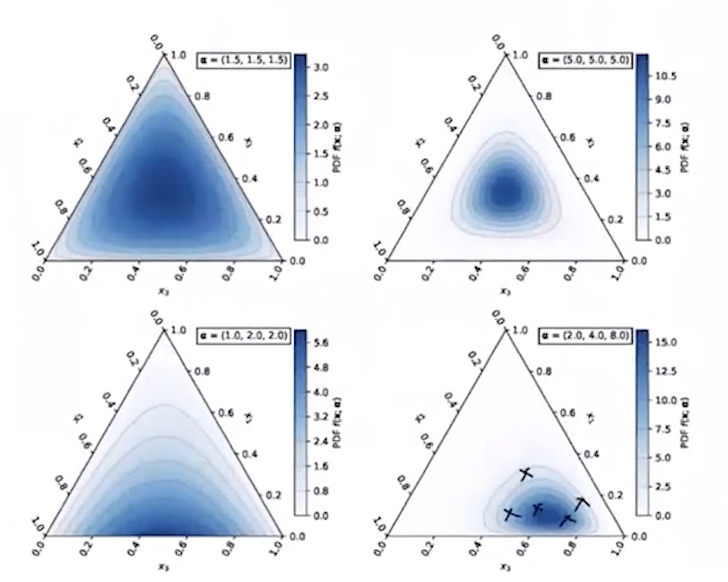

### LDA 예시

#### 문서
* doc1: 나는 추천을 공부한다.
* doc2: 나는 영화 아이언맨을 봤다.
* doc3: 추천을 통해 영화를 봤다.

#### 문서의 토픽 분포 k= 2짜리 디리클레 분포 사용 (topic A와 B)
* doc1: topic A 100%
  * [1.0,0.0]
* doc2: topic B 100%
  * [0.0,1.0]
* doc3: topic A 60%, topic B 40%
  * [0.6,0.4]

#### 토픽의 단어 분포 k= 7짜리 디리클레 분포 사용 (words 7개의 각각의 확률)
* topic A: 나는 10%, **추천을 40%, 공부한다 25%**, 영화 5%, 아이언맨을 5%, 봤다 10%, 통해 5%

* topic B: 나는 10%, 추천을 10%, 공부한다 5%, **영화 25%, 아이언맨을 30%**, 봤다 15%, 통해 5%

### LDA의 가정
* 문서 작성을 위해 토픽을 고르고, 선택한 토픽에 맡게 단어를 선택해 문서에 넣는다.

* 문서에 사용할 단어 수 선정
* 토픽 분포를 확률 분포에 기반해 고른다 (ex: A- 60%, B- 40%)
* 문서의 토픽분포로부터 토픽 T를 추출
* 선택한 토필 T의 단어 확률 분포로부터 단어 한개를 골라 문서에 넣음
* 단어의 순서 따위는 신경쓰지 않는다.



### LDA 생성 과정
1. 토픽 개수 k 설정
k개의 토픽은 모든 문서에 분포해있다.

2. 전체 문서에 있는 단어들에 k개 중 하나의 토픽을 랜덤하게 할당
  * 같은 단어가 한 문서 내에 여러개 있을 때, 서로 다른 토픽에 할당될 수 있음
  * 깁스(gibbs) 샘플링을 활용


3. 각 이터레이션 반복
  * 각 문서의 개별 단어에 대해 해당 단어 제외 나머지 단어는 올바르게 할당 된 것을 가정
  * 이를 활용해 해당 단어에 토픽을 재할당하고, 이를 전체 단어에 대해 모두 진행하는 것 한번이 1 epoch임


cat에 A를 할당하는 경우, doc1의 cat을 가리고 해당 위치에 각각 A가 들어갈 확률과, B가 들어갈 확률을 구한다. 
* $P(A|doc1)=\frac {2}{4} = 0.5, P(cat|A) = \frac {1}{6} = 0.167$
* $P(topic_{doc1,cat}=A)=P(A|doc1)\cdot P(cat|A)$


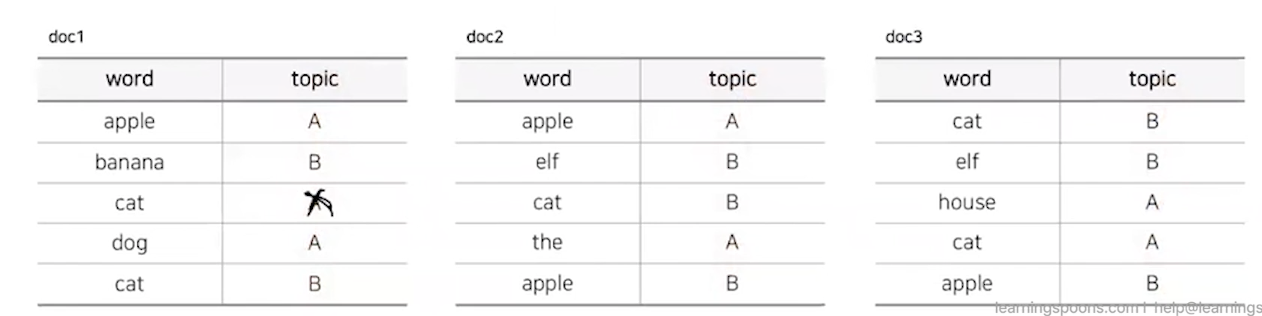

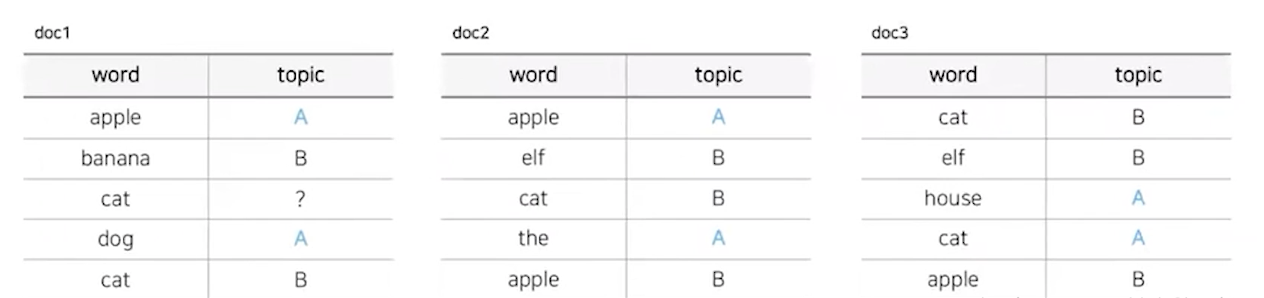

cat에 B를 할당하는 경우도 똑같이 구해준다.
* $P(B|doc1)=\frac {2}{4} = 0.5, P(cat|B) = \frac {3}{8} = 0.375$
* $P(topic_{doc1,cat}=B)=P(B|doc1)\cdot P(cat|B)$


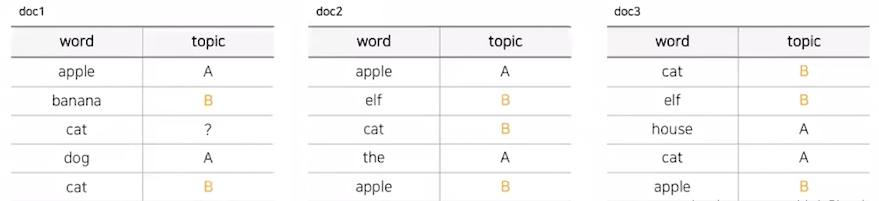

### LDA 학습 결과
* 문서 토픽의 분포
  * $\theta_d ~ Dir(\alpha), \alpha$: 문서틔 토픽 분포 생성을 위한 디리클레 분포 파라미터
* 토픽 단어의 분포
  * $\Phi_k ~Dir(\beta), \beta$: 토픽의 단어 분포 생성을 위한 디리클레 분포 파라미터 

### 최적의 토픽 수
* Perplexity 이용
  * 토픽 개수를 결정할 때
  * 학습의 반복 횟수를 결정
  * Supervised Learning에서의 evaluation loss처럼 여기면 됨
  * Perplexity가 낮은 토픽 수 k를 토픽수로 삼음
  * Perplexity가 낮다고 결과해석이 용이하진 않음

* 확률 모델이 결과를 얼마나 잘 예측하는지 의미
  * 토픽 내 문서 내 단어 발생확률이 클 수록 성능이 좋음
  * 모든 단어의 확률 $p(w)$를 구하면 마이너스 로그를 취하고 exponetial 한다.
    * 점점 작아지도록 하여 작을 수록 더 정확함을 의미하도록 한다.



## 추천에서의 LDA

### 토픽 모델링의 응용
* 유저 $\rightarrow$ 문서, 아이템 $\rightarrow$ 단어로 볼 수 있음
  * 유저 단위(Document)로 소비한 아이템(Words)을 파악 가능
  * 아이템이 많이 나온 경우, 그 유저는 해당 아이템을 애용한다고 생각할 수 있음

* 유저 별로 토픽 분포를 가짐
  * 어떤 유저는 전자기기, 어떤 유저는 생활용품 이렇게 각자 관심사와 주 구매 품목이 다를 수 있다. 
  * 유저 별 latent factor를 가지게 되는 것 (k 차원의 토픽)

* 아이템 별로도 토픽 분포를 가짐
  * 토픽이 카테고리가 될 수 있고, 해당 카테고리 안에 상품이 분포하게 됨

* 관심도와 연관도를 활용
  * 유저가 관심있는 토픽에 속한 연관도 높은 아이템을 추천
  
